# Setup: import packages

In [1]:
#install packages if required
#%pip install networkx

In [2]:
#import packages 
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import scipy.integrate as integrate 
from scipy.optimize import minimize_scalar
from scipy.misc import derivative
import os
from random import *

In [3]:
network_analysis_path_ben = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/pytrans_UrbanNetworkAnalysis/pytrans/UrbanNetworkAnalysis/Originals_edited'
#network_analysis_path_niamh = r'C:\Users\35387\OneDrive\Documents\Networks\New folder\Networks_Term_Paper\pytrans_UrbanNetworkAnalysis\pytrans\UrbanNetworkAnalysis\original_edited'
os.chdir(network_analysis_path_ben)
import Frank_Wolfe
import TransportationNetworks as tn
import visualize_graph

# Read in data

In [4]:
data_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/'
city = 'Birmingham'
data_path = data_path + city + '/'
os.chdir(data_path)
link_file_path = data_path + city + '_net.tntp'
node_file_path = data_path + city +'_nodes.tntp'
trip_file_path = data_path+ city + '_trips.tntp'

# Load Data

In [5]:
data_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/'
cities = ['Birmingham', 'Philadelphia', 'SiouxFalls']
data_path = data_path 
os.chdir(data_path)

In [6]:
#create dictionary with cities and three files: links, nodes and trips
cities_dict = {}
for city in cities:
    link_file_path = data_path + city + '/' + city + '_net.tntp'
    node_file_path = data_path + city + '/' + city +'_nodes.tntp'
    trip_file_path = data_path + city + '/' + city + '_trips.tntp'
    cities_dict[city] = {}
    to_add = {'link_file_path': link_file_path, 'node_file_path': node_file_path, 'trip_file_path': trip_file_path}
    cities_dict[city]['file_paths'] = to_add 
cities_dict

{'Birmingham': {'file_paths': {'link_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Birmingham/Birmingham_net.tntp',
   'node_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Birmingham/Birmingham_nodes.tntp',
   'trip_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Birmingham/Birmingham_trips.tntp'}},
 'Philadelphia': {'file_paths': {'link_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Philadelphia/Philadelphia_net.tntp',
   'node_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Philadelphia/Philadelphia_nodes.tntp',
   'trip_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Philadelphia/Philadelphia_trips.tntp'}},
 'Siou

In [7]:
#create a csv for each city and corresponding file for investigation
for city in cities_dict.keys():
    path_list = list(cities_dict[city]['file_paths'].keys())
    for paths in path_list:
        #load network file
        network_file = path_list[0]
        csv = pd.read_csv(cities_dict[city]['file_paths'][network_file], skiprows=8, sep='\t') #gets link file path
        trimmed= [s.strip().lower() for s in csv.columns]
        csv.columns = trimmed
        # And drop the silly first andlast columns
        csv.drop(['~', ';'], axis=1, inplace=True)
        cities_dict[city]['csv'] = csv
        
        #load node file
        
        
        #load trips file 
        
    

        
        

In [8]:
cities_dict['SiouxFalls']['csv']

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type
0,1,2,25900.200640,6,6,0.15,4,0,0,1
1,1,3,23403.473190,4,4,0.15,4,0,0,1
2,2,1,25900.200640,6,6,0.15,4,0,0,1
3,2,6,4958.180928,5,5,0.15,4,0,0,1
4,3,1,23403.473190,4,4,0.15,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...
71,23,22,5000.000000,4,4,0.15,4,0,0,1
72,23,24,5078.508436,2,2,0.15,4,0,0,1
73,24,13,5091.256152,4,4,0.15,4,0,0,1
74,24,21,4885.357564,3,3,0.15,4,0,0,1


In [9]:
for city in cities_dict.keys():
    print('Total number of nodes in', city+':', len(cities_dict[city]['csv']['init_node'].unique()))
    print('Total number of edges in', city+':', cities_dict[city]['csv'].shape[0])

Total number of nodes in Birmingham: 14639
Total number of edges in Birmingham: 33937
Total number of nodes in Philadelphia: 13389
Total number of edges in Philadelphia: 40003
Total number of nodes in SiouxFalls: 24
Total number of edges in SiouxFalls: 76


To note:

- No idea what b is 
- Below is a couple of definitions from the GitHub page which might come in handy

Link travel time = free flow time * ( 1 + B * (flow/capacity)^Power ).
Link generalized cost = Link travel time + toll_factor * toll + distance_factor * distance

#load node file
        brum_nodes = pd.read_csv(node_file_path, sep = ' ')
for_drop = []
for i in list(range(1,14)):
    name = 'Unnamed: ' + str(i)
    for_drop.append(name)
for_drop.remove('Unnamed: 7')
brum_nodes = brum_nodes.drop(for_drop, axis = 1)

#load trips file
#load node file - note this is a bit fiddly, could be a better way to import but chose something quick and dirty
brum_nodes = pd.read_csv(node_file_path, sep = ' ')
for_drop = []
for i in list(range(1,14)):
    name = 'Unnamed: ' + str(i)
    for_drop.append(name)
for_drop.remove('Unnamed: 7')
brum_nodes = brum_nodes.drop(for_drop, axis = 1)

# Take subset of networks

seed = 5
random = Random(seed)
for city in cities_dict.keys():
    #get random subset of 100 nodes§
    nodes_subset = Random.choices(list(cities_dict[city]['csv']['init_node'].unique()), k = 100)

# Plot graph

In [10]:
#select csv
city = 'SiouxFalls'
csv = cities_dict['SiouxFalls']['csv']
network = nx.from_pandas_edgelist(csv, source = 'init_node',target='term_node', edge_attr = True)

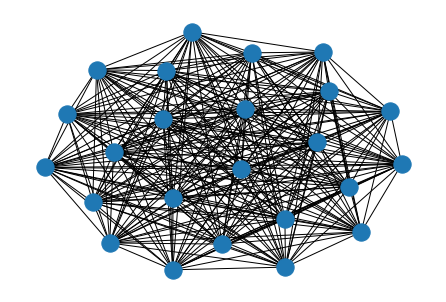

In [11]:
graph = nx.complete_graph(network)
nx.draw(graph)

# Compute equilibrium flow using Frank-Wolfe algorithm

In [12]:
#set city for investigation
city = 'SiouxFalls'

In [13]:
#instantaite classes from Transportation Networks.py

##inputs are link and trip file
Network = tn.Network(cities_dict[city]['file_paths']['link_file_path'], cities_dict[city]['file_paths']['trip_file_path'], cities_dict[city]['file_paths']['node_file_path'])

In [14]:
##Network has three attributes
#1) graph object
graph = Network.graph
#2) origin nodes
origin_nodes = Network.origins
#3)dict: keys= origin_node, destination_node, value = traffic flow
flows = Network.od_vols
print(city, 'graph is:', graph)
print(city, 'origin nodes are:', origin_nodes)
print(city, 'flows are:', flows)

SiouxFalls graph is: DiGraph with 24 nodes and 76 edges
SiouxFalls origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
SiouxFalls flows are: {('1', '1'): 0.0, ('1', '2'): 100.0, ('1', '3'): 100.0, ('1', '4'): 500.0, ('1', '5'): 200.0, ('1', '6'): 300.0, ('1', '7'): 500.0, ('1', '8'): 800.0, ('1', '9'): 500.0, ('1', '10'): 1300.0, ('1', '11'): 500.0, ('1', '12'): 200.0, ('1', '13'): 500.0, ('1', '14'): 300.0, ('1', '15'): 500.0, ('1', '16'): 500.0, ('1', '17'): 400.0, ('1', '18'): 100.0, ('1', '19'): 300.0, ('1', '20'): 300.0, ('1', '21'): 100.0, ('1', '22'): 400.0, ('1', '23'): 300.0, ('1', '24'): 100.0, ('2', '1'): 100.0, ('2', '2'): 0.0, ('2', '3'): 100.0, ('2', '4'): 200.0, ('2', '5'): 100.0, ('2', '6'): 400.0, ('2', '7'): 200.0, ('2', '8'): 400.0, ('2', '9'): 200.0, ('2', '10'): 600.0, ('2', '11'): 200.0, ('2', '12'): 100.0, ('2', '13'): 300.0, ('2', '14'): 100.0, ('2', '15'): 100.

1  ->  2 :  4494.541769891608
1  ->  3 :  8118.778958018833
2  ->  1 :  4519.221797661597
2  ->  6 :  5967.415424264172
3  ->  1 :  8094.098930248844
3  ->  4 :  14011.734532365375
3  ->  12 :  10027.635980625804
6  ->  2 :  5992.095452034151
6  ->  5 :  8806.410890570694
6  ->  8 :  12492.075338963252
4  ->  3 :  14035.300255284554
4  ->  5 :  18010.561177668467
4  ->  11 :  5203.13865525387
12  ->  3 :  9979.390229936655
12  ->  11 :  8404.306735865635
12  ->  13 :  12293.499582309718
5  ->  4 :  18034.525518068713
5  ->  6 :  8797.1895868881
5  ->  9 :  15783.996289327333
11  ->  4 :  5302.740037772761
11  ->  10 :  17603.652145860353
11  ->  12 :  8365.259304287434
11  ->  14 :  9776.846543284393
9  ->  5 :  15798.73932604504
9  ->  8 :  6837.003588255241
9  ->  10 :  21745.98823492458
8  ->  6 :  12525.976670415792
8  ->  7 :  12041.696631484156
8  ->  9 :  6881.813917130209
8  ->  16 :  8387.782258682433
7  ->  8 :  12102.268632570476
7  ->  18 :  15797.411851030634
18  ->  7 :  

TypeError: draw_networkx_nodes() got an unexpected keyword argument 'with_labels'

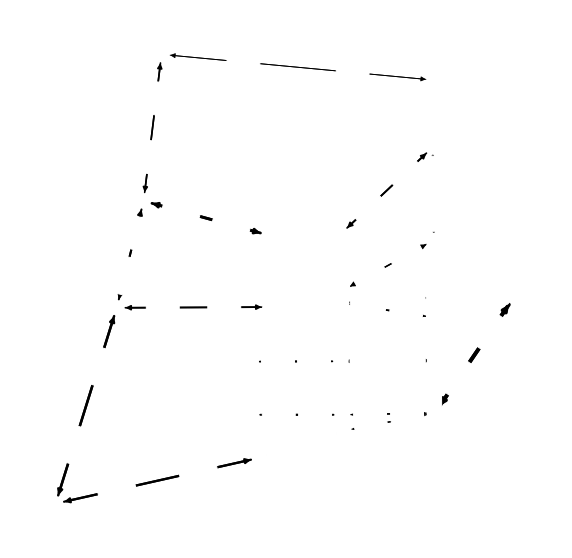

In [15]:
#set city for FW
city = 'SiouxFalls'
SO = False
fw = Frank_Wolfe.Run(cities_dict[city]['file_paths']['link_file_path'], cities_dict[city]['file_paths']['trip_file_path'], cities_dict[city]['file_paths']['node_file_path'], SO)
fw.showODFlow()
fw.showODFlowMap()

In [20]:
fw.network['1','2']

{'t0': 6.0,
 'alpha': 0.15,
 'beta': 4.0,
 'capa': 25900.20064,
 'flow': [6100.0,
  5207.357745674479,
  4711.657897117369,
  4930.656635337685,
  4730.6043505557045,
  4827.107543259971,
  4636.859945867077,
  4716.003384682547,
  4508.963543275069,
  4601.436769895128,
  4441.547483051428,
  4547.956882542501,
  5438.8539424987985,
  5226.6061887445785,
  4849.050563645634,
  4814.696103271424,
  4640.649767965101,
  4804.973897150654,
  4649.1135058759955,
  4590.196792499282,
  4434.2013303186395,
  4486.329679977396,
  4426.937820861189,
  4719.457656295175,
  4670.276410676221,
  4603.7077161146135,
  4533.041846264655,
  4524.797833253257,
  4461.18411338973,
  4676.755985196323,
  4570.532597622668,
  4599.482742780279,
  4523.084262206365,
  4519.235180730319,
  4479.371119331581,
  4641.37201623978,
  4608.348820688561,
  4574.367489774171,
  4532.286360252914,
  4488.4933809486165,
  4486.043875187683,
  4454.493795916746,
  4428.252112673099,
  4621.6870998641725,
  4601.20